In [1]:
#TASK 3

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy
import scipy.constants as c

def F(x,A,TD):
    s = 5
    return A/(1+x/TD)*1/np.sqrt(1+x/TD*s**2)


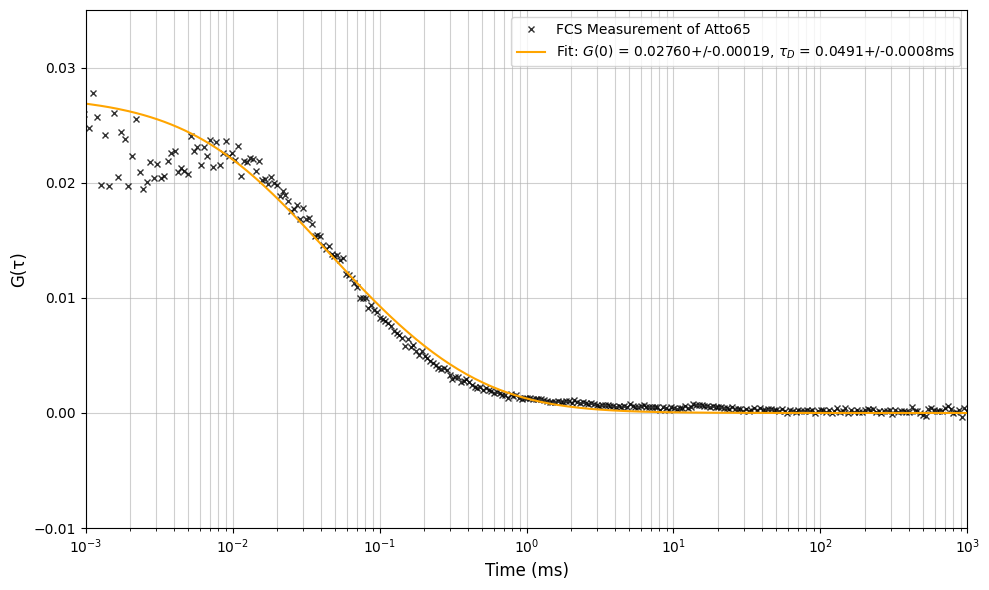

In [3]:
#TASK 3a

A = ufloat(0.027597, 187.5*10**-6)
TD = ufloat(0.049133, 803.0*10**-6) #in ms


data = np.loadtxt('Daten/3a_600sacq_1000scorr.dat', comments="#")
#print(a3_data)
x_log = data[:, 0]  # log10(time in seconds)
y = data[:, 1]      # correlation values


x_ms = 10**x_log 

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(x_ms, y, 'x', markersize=5, color = "black", alpha = 0.8, label = "FCS Measurement of Atto655")
ax.plot(x_ms,F(x_ms/10,A.n,TD.n),color="orange", label=f"Fit: $G(0)$ = {A}, $ \\tau_D $ = {TD}ms") #Warum muss ich hier x_ms durch 10 teilen?? ist bei den einheiten was kaputt?
# Set logarithmic x-axis
ax.set_xscale('log')
ax.set_xlim(1e-3, 1e3)  # 10^-2 to 10^3 ms

# Set linear y-axis with appropriate range
ax.set_ylim(-0.01,0.035)

# Labels and grid
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('G(τ)', fontsize=12)
#ax.set_title(', fontsize=14)
ax.grid(True, which='both', alpha=0.6)
ax.legend()

plt.tight_layout()
plt.savefig("fcs_3a.png",dpi=100)
plt.show()


In [4]:

D = ufloat((382.8+372.3)/2,(382.8-372.3)/2+(382.8+372.3)*0.019) #bei 20.5 °C, +-0.5°C, mit 1,9% unsicherheit auf tabelleneintrag 
print(D)
#print(A)
#print(TD) #in ms!!
r_0 = unumpy.sqrt(4*D*TD/1000)
print(f"r_0 = {r_0} microns")
z_0 = 5*r_0
print(f"z_0 = {z_0} microns")
V_eff = np.pi**(3/2)*r_0**2*z_0
print(V_eff," femtoliter")
V_eff = np.pi**(3/2)*5*r_0**3 
print(V_eff)

378+/-20
r_0 = 0.272+/-0.007 microns
z_0 = 1.36+/-0.04 microns
0.56+/-0.05  femtoliter
0.56+/-0.05


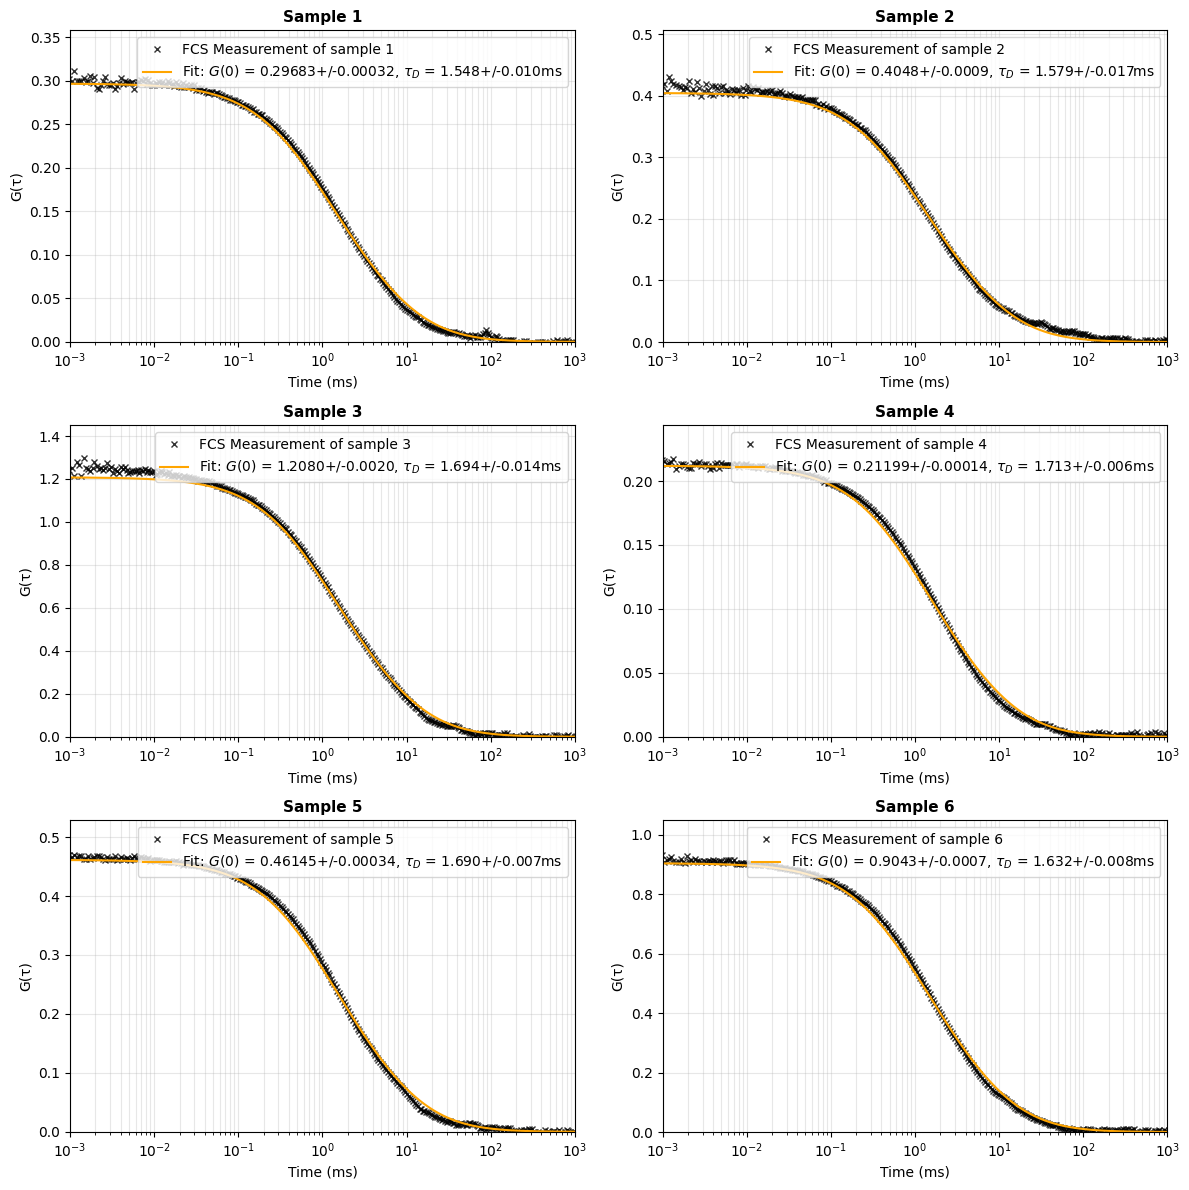

In [5]:
#TASK 3b




# Create a 3x2 subplot figure
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten to easily iterate
A = unumpy.uarray([0.296833,0.404815,1.208002,0.211990,0.461453,0.904256],[0.0003205,0.0009043,0.002039,0.0001363,0.0003379,0.0007355])
TD = unumpy.uarray([1.547584,1.579139,1.694132,1.713335,1.690252,1.631684],[0.009687,0.016968,0.013874,0.006441,0.007228,0.007728])
# Loop through all 6 samples
for i in range(6):
    sample_num = i + 1
    filename = f'Daten/3b_sample{sample_num}_120s.dat'
    
    try:
        # Read the data
        data = np.loadtxt(filename, comments='#',skiprows=22)
        x_log = data[:, 0]  # log10(time in seconds)
        y = data[:, 1]      # correlation values
        
        # Convert x from log10(seconds) to milliseconds
        x_ms = 10**x_log  
        
        # Plot on the appropriate subplot
        ax = axes[i]
        ax.plot(x_ms, y, 'x', markersize=5, color = "black", alpha = 0.8, label = f"FCS Measurement of sample {sample_num}")
        ax.plot(x_ms,F(x_ms/10,A[i].n,TD[i].n),color="orange", label=f"Fit: $G(0)$ = {A[i]}, $ \\tau_D $ = {TD[i]}ms") #Warum muss ich hier x_ms durch 10 teilen?? ist bei den einheiten was kaputt?
        # Set logarithmic x-axis
        ax.set_xscale('log')
        ax.set_xlim(1e-3, 1e3)  # 10^-2 to 10^3 ms
        
        # Set linear y-axis with appropriate range
        ax.set_ylim(0 - 0.1 * abs(min(y)), max(y) + 0.1 * abs(max(y)))
        
        # Labels and title
        ax.set_xlabel('Time (ms)', fontsize=10)
        ax.set_ylabel('G(τ)', fontsize=10)
        ax.set_title(f'Sample {sample_num}', fontsize=11, fontweight='bold')
        ax.grid(True, which='both', alpha=0.3)
        ax.legend(loc="upper right")
    except FileNotFoundError:
        ax = axes[i]
        ax.text(0.5, 0.5, f'File not found:\n{filename}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Sample {sample_num}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig("fcs_3b.png",dpi=100)
plt.show()

In [8]:
print(A)
print(TD)
T = ufloat(293.65,0.5)
nu = ufloat((1001.4+977.4)/2,(1001.4-977.4)/2) #bei 20.5 +- 0.5 grad C
print(nu)
R_H = 4*c.k*T*TD/1000/(6*np.pi*nu*10**(-6)*(r_0*10**(-6))**2)
print(R_H) #hydrodynamic radius




conc = 1/(A*c.N_A*V_eff*10**(-15))
print(conc)

[0.296833+/-0.0003205 0.404815+/-0.0009043 1.208002+/-0.002039
 0.21199+/-0.0001363 0.461453+/-0.0003379 0.904256+/-0.0007355]
[1.547584+/-0.009687 1.579139+/-0.016968 1.694132+/-0.013874
 1.713335+/-0.006441 1.690252+/-0.007228 1.631684+/-0.007728]
989+/-12
[1.8136218222226718e-08+/-1.0179675785122616e-09
 1.8506012925455987e-08+/-1.0512229651436942e-09
 1.9853621935389222e-08+/-1.1192847690847834e-09
 2.0078662901515406e-08+/-1.1225059773845688e-09
 1.98081520114935e-08+/-1.1081186259662256e-09
 1.9121790541719078e-08+/-1.070429994743987e-09]
[9.941009305257814e-09+/-8.115206614821988e-10
 7.289304040382872e-09+/-5.952230561173638e-10
 2.4427274252092237e-09+/-1.994338853891556e-10
 1.3919617034329887e-08+/-1.1362446957344954e-09
 6.394626571086531e-09+/-5.219919095552412e-10
 3.2632568820196855e-09+/-2.6638142176961735e-10]
